In [105]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data/train.csv')

In [106]:
#Elimino las propiedades con un NAN en provincia
df = df.dropna(subset=['provincia'])
df = df.fillna(0)
df = df[df["provincia"] != 0]

In [107]:
promedio_escuelas = df.groupby("provincia")["escuelascercanas"].mean()
promedio_escuelas = promedio_escuelas.to_frame()
promedio_escuelas.rename(columns = {'escuelascercanas': 'Promedio de escuelas por propiedad'}, inplace=True)
promedio_escuelas

,Promedio de escuelas por propiedad
provincia,
Aguascalientes,0.561323
Baja California Norte,0.471118
Baja California Sur,0.284118
Campeche,0.277567
Chiapas,0.333925
Chihuahua,0.264052
Coahuila,0.429770
Colima,0.381944
Distrito Federal,0.478279


In [108]:
#Creo mi mapa de mexico
mexico = geopandas.read_file('Data/mexstates.shp') #Los estados pueden ser vistos con mexico.ADMIN_NAME
mexico["ADMIN_NAME"].replace({'Nuevo Leon': "Nuevo León",
                               "San Luis Potosi": "San luis Potosí",
                               "Queretaro": "Querétaro",
                               "Yucatan": "Yucatán",
                               "Michoacan": "Michoacán",
                               "Mexico": "Edo. de México",
                               "Baja California": "Baja California Norte"}, inplace=True)
gdf = mexico.set_index("ADMIN_NAME").join(promedio_escuelas)

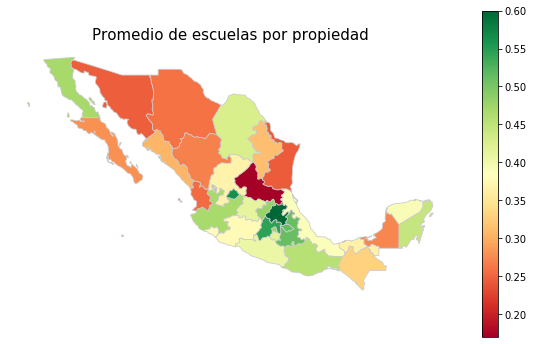

In [109]:
#Grafico el mapa

#Base donde se va a dibujar
fig, base = plt.subplots(1, figsize=(10, 6))

#Saco los ejes de lat y lng ya que no aportan al gráfico
base.axis("off")

#Pido que me coloreé en base a la antiguedad
gdf.plot(column="Promedio de escuelas por propiedad", cmap="RdYlGn", linewidth=0.8, ax=base, edgecolor="0.8")

#Setteo el título al gráfico
base.set_title("Promedio de escuelas por propiedad", fontsize = 15)

#Agrego la barra que indica la antiguedad
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=plt.Normalize(vmin=0.17, vmax=0.60))
cbar = fig.colorbar(sm)

### Top 5 provincias con mayor promedio de escuelas por propiedad

In [110]:
promedio_escuelas.nlargest(5, "Promedio de escuelas por propiedad")

,Promedio de escuelas por propiedad
provincia,
Hidalgo,0.598572
Aguascalientes,0.561323
Edo. de México,0.544812
Tlaxcala,0.516091
Puebla,0.511659


### Top 5 provincias con menor promedio de escuelas por propiedad

In [111]:
promedio_escuelas.nsmallest(5, "Promedio de escuelas por propiedad")

,Promedio de escuelas por propiedad
provincia,
San luis Potosí,0.176394
Tamaulipas,0.249240
Sonora,0.251339
Nayarit,0.259615
Chihuahua,0.264052
